In [32]:
import duckdb
file = "C:/Users/manat/Documents/Projects/mtlBiodiversity/data/db/mtlbio.duckdb"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [ ]:
con = duckdb.connect(file)
df = con.execute("SELECT * from grid_sjoin").df()

#df.head()

In [19]:
df.describe()


,gbifID,day,month,year,taxonKey,coordinateUncertaintyInMeters,grid_id,minx,miny,maxx,maxy
count,2.041420e+05,204142.000000,204142.000000,204142.000000,2.041420e+05,1.784500e+05,168559.000000,168559.000000,168559.000000,168559.000000,168559.000000
mean,4.253551e+09,15.870899,6.931553,2021.716256,4.252883e+06,1.561092e+03,29771.625947,-73.655840,45.517325,-73.653247,45.518899
std,8.376503e+08,9.015378,2.207906,8.096172,2.539049e+06,4.059655e+04,12386.164470,0.130460,0.066771,0.130460,0.066769
min,8.911318e+08,1.000000,1.000000,1873.000000,2.160000e+02,1.000000e+00,171.000000,-73.967586,45.411978,-73.964993,45.413555
25%,3.772844e+09,8.000000,5.000000,2021.000000,2.482492e+06,8.000000e+00,20125.000000,-73.757536,45.471068,-73.754943,45.472643
50%,4.176972e+09,15.000000,7.000000,2023.000000,3.133512e+06,3.100000e+01,35262.000000,-73.598053,45.504918,-73.595460,45.506492
75%,4.946204e+09,24.000000,9.000000,2024.000000,5.329887e+06,1.890000e+02,38553.000000,-73.563045,45.557621,-73.560452,45.559194
max,5.828941e+09,31.000000,12.000000,2025.000000,1.229128e+07,8.200985e+06,46622.000000,-73.477469,45.702103,-73.474876,45.703672


In [ ]:
df.describe(exclude=[np.number])

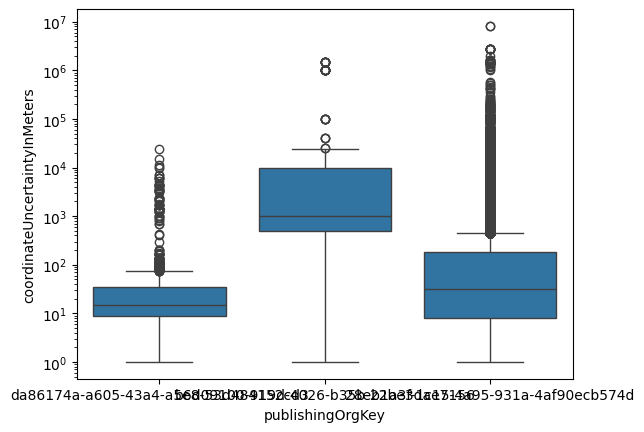

In [30]:
sns.boxplot(df, x = df.publishingOrgKey,y = df.coordinateUncertaintyInMeters)
plt.yscale('log')
#df.coordinateUncertaintyInMeters.median

In [7]:
df_issues = df.groupby(['grid_id']).agg(issue_count = ('issue', 'nunique'),
                                        species_richness = ('species', 'nunique'),
                                        coordinateUncertaintyMax = ('coordinateUncertaintyInMeters', 'max'),
                                        coordinateUncertaintyMean = ('coordinateUncertaintyInMeters', 'mean'),
                                        coord_precision_max = ('coordinatePrecision', 'max' ),
                                        coord_precision_min = ('coordinatePrecision', 'min' ),
                                        coord_precision_mean = ('coordinatePrecision', 'mean' )
                                    
                                        
                                        ).sort_values(by = 'species_richness', ascending= False)
df_issues.head(2)
#df_issues.describe()

,issue_count,species_richness,coordinateUncertaintyMax,coordinateUncertaintyMean,coord_precision_max,coord_precision_min,coord_precision_mean
grid_id,,,,,,,
34294.0,5,489,235.0,13.148810,NaN,NaN,NaN
44592.0,3,415,793.0,753.161782,NaN,NaN,NaN


In [8]:
df_orgs = df.groupby(['grid_id']).agg(orgs = ('publishingOrgKey', pd.Series.mode))
df_orgs.head()


,orgs
grid_id,
171.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
174.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
176.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
180.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d
181.0,28eb1a3f-1c15-4a95-931a-4af90ecb574d


In [9]:
df1 = df_issues.merge(df_orgs, on = 'grid_id')
df1.head()

,issue_count,species_richness,coordinateUncertaintyMax,coordinateUncertaintyMean,coord_precision_max,coord_precision_min,coord_precision_mean,orgs
grid_id,,,,,,,,
34294.0,5,489,235.0,13.148810,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
44592.0,3,415,793.0,753.161782,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
7152.0,6,374,27158.0,1750.381443,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
28055.0,5,369,44306.0,42.814788,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
36027.0,4,365,129359.0,116.505249,NaN,NaN,NaN,28eb1a3f-1c15-4a95-931a-4af90ecb574d
